Compare distributions of neural activity projected onto FFV axis between true and reversed songs

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from disp import set_plot

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

NR = 224  # original number of responses
NTR = 276  # number of trials

R_COLS = [f'R_{cr}' for cr in range(NR)]

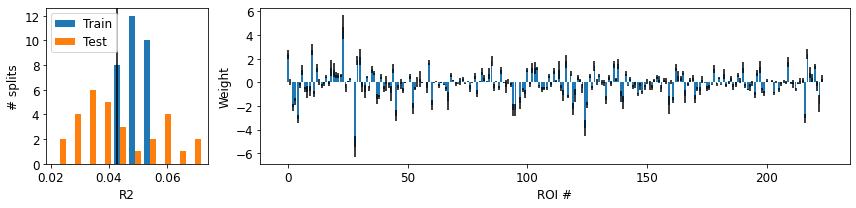

In [2]:
# mean regressor from lin fit from dyn neurons
DYN_FFV_FIT_FILE = 'data/simple/mlv_c/neur_basic/c_baker_ridge_0.1_dyn_all_ffv_276_tr.npy'
# DYN_FFV_FIT_FILE = 'data/simple/mlv_c/neur_basic/c_baker_dyn_all_ffv_276_tr.npy'
dyn_fit_data = np.load(DYN_FFV_FIT_FILE, allow_pickle=True)[0]

r2_train = dyn_fit_data['r2_train']
r2_test = dyn_fit_data['r2_test']

w_mn = dyn_fit_data['w'].mean(axis=0)
w_sd = dyn_fit_data['w'].std(axis=0)

gs = gridspec.GridSpec(1, 4)
fig = plt.figure(figsize=(12, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1:])]
axs[0].hist(np.array([r2_train, r2_test]).T)
axs[0].legend(['Train', 'Test'])
axs[0].axvline(r2_test.mean(), c='k')
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=12)

axs[1].bar(range(NR), w_mn, yerr=w_sd)
set_plot(axs[1], x_label='ROI #', y_label='Weight', font_size=12)

Compute projection of neural activity onto FFV axis for natural, reversed, and scrambled song datasets

In [21]:
KEYS = ['Natural', 'Modes swapped', 'Reversed', 'Bout-rev.', 'Scrambled']
DATA_DIRS = [
    'data/simple/mlv_c/neur_basic/c_baker_dyn', 'data/simple/mlv_c/perturbed_song/c_baker_dyn_mode_swap',
    'data/simple/mlv_c/perturbed_song/c_baker_dyn_rvrs', 'data/simple/mlv_c/perturbed_song/c_baker_dyn_bt_rvrs',
    'data/simple/mlv_c/perturbed_song/c_baker_dyn_scrm']
PFXS = ['mlv_c_baker_dyn', 'mlv_c_baker_dyn_mode_swap', 'mlv_c_baker_dyn_rvrs', 'mlv_c_baker_dyn_bt_rvrs', 'mlv_c_baker_dyn_scrm']

ffv_prjs = {key: [] for key in KEYS}

for key, data_dir, pfx in zip(KEYS, DATA_DIRS, PFXS):
    print(key, '...')
    # loop over trials
    for ctr in range(NTR):
        df = np.load(os.path.join(data_dir, f'{pfx}_tr_{ctr}.npy'), allow_pickle=True)[0]['df']
        rs = np.array(df[R_COLS])
        ffv_prjs[key].append(rs @ w_mn)

Natural ...
Modes swapped ...
Reversed ...
Bout-rev. ...
Scrambled ...


Natural : mean =  -0.038225629958615795
Natural : std =  0.04541548250723762
Modes swapped : mean =  -0.030037083379004736
Modes swapped : std =  0.06298981961722602
Reversed : mean =  -0.05295609677986231
Reversed : std =  0.048988566499098385
Bout-rev. : mean =  -0.03872861332526244
Bout-rev. : std =  0.045624052201865294
Scrambled : mean =  0.044544543636388864
Scrambled : std =  1.8468524237776052


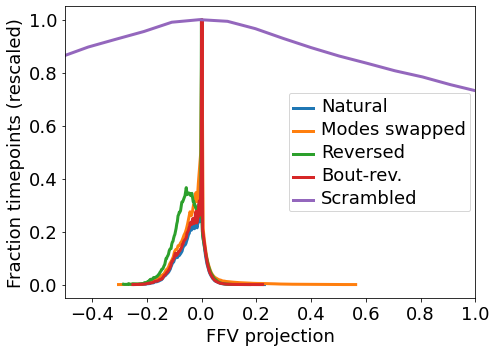

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)
for key in KEYS:
    cts, bins = np.histogram(cc(ffv_prjs[key]), bins=200, density=True)
    binc = .5*(bins[:-1] + bins[1:])
    
    ax.plot(binc, cts/cts.max(), lw=3)
    
    print(key, ': mean = ', cc(ffv_prjs[key]).mean())
    print(key, ': std = ', cc(ffv_prjs[key]).std())
    
ax.legend(KEYS)
set_plot(ax, x_lim=[-.5, 1], x_label='FFV projection', y_label='Fraction timepoints (rescaled)', font_size=18)